In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data_train = pd.read_csv("hospitalizaciones_train.csv")

In [88]:
data_train['Department'].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [89]:
data_train.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [90]:
data_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


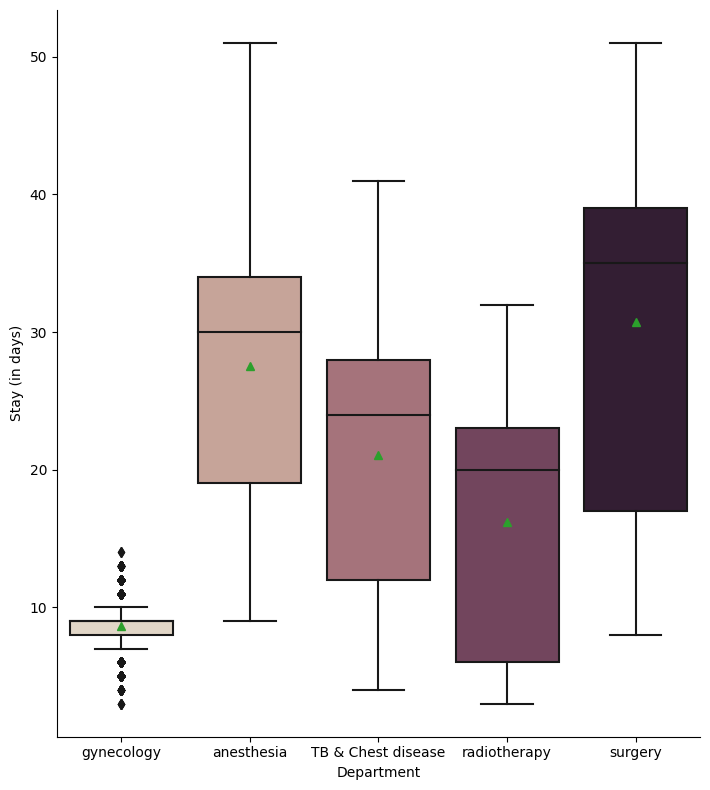

In [91]:
sns.catplot(data=data_train,x='Department',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

las medias de todos los departamentos estan por encima de los 8 dias, y tienen rangos muy grandes de dias no parece ser una variable que me diga mucho.

In [92]:
data_train['Department'].value_counts()

gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64

por el boxplot pense que lo que menos habia eran datos de ginecologia pero parece que es lo que mas hay sin embargo la cantidad de dias que se quedan esta definida justo sobre el rango que de los 8 dias asi que seguramente es dificil tener en cuenta, sin embargo tal vez sirva para separar algun paciente de ginecologia. lo tendre en cuenta

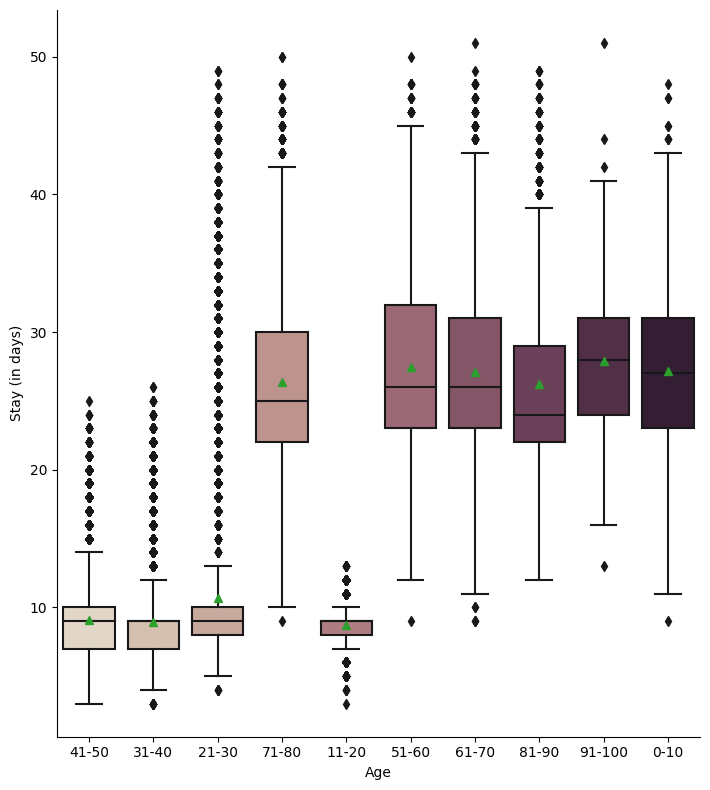

In [93]:
sns.catplot(data=data_train,x='Age',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

aca veo que los pacientes entre 11-50 tienen un rango de estadia mas acotado entre 15-6 o por ahi, pero los demas rangos de edad tienen un rango mucho mejor definido a mas tiempo de estadia, incluso solo se puede llegar a ver alguno que otro que se haya quedado menos de 10 dias. este dato puede servir.

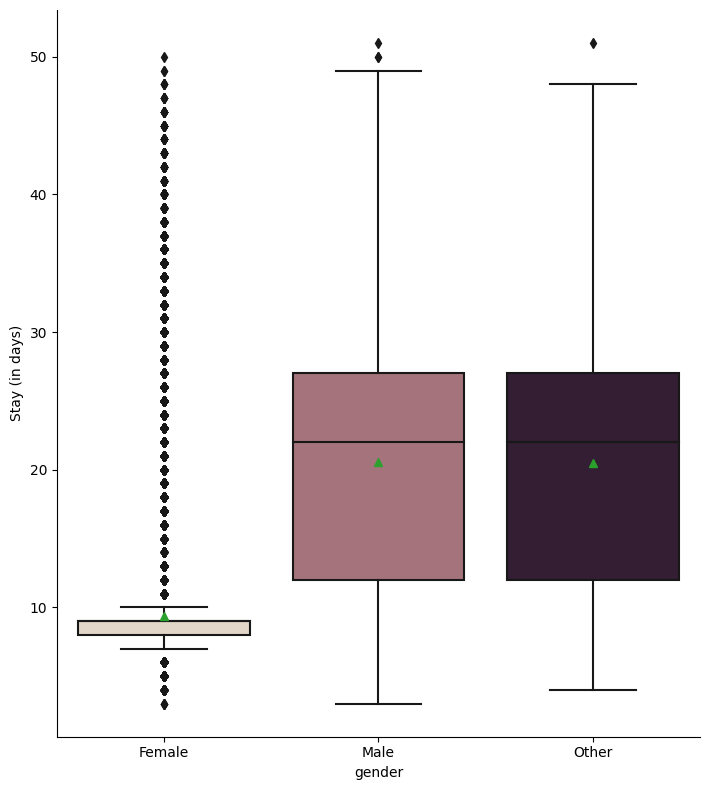

In [94]:
sns.catplot(data=data_train,x='gender',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

las pacientes femeninas parecen estar mas definidas entre 10 y 7 dias (estimo), no veo una separacion muy buena que me pueda servir pero puede ser que defina algun caso

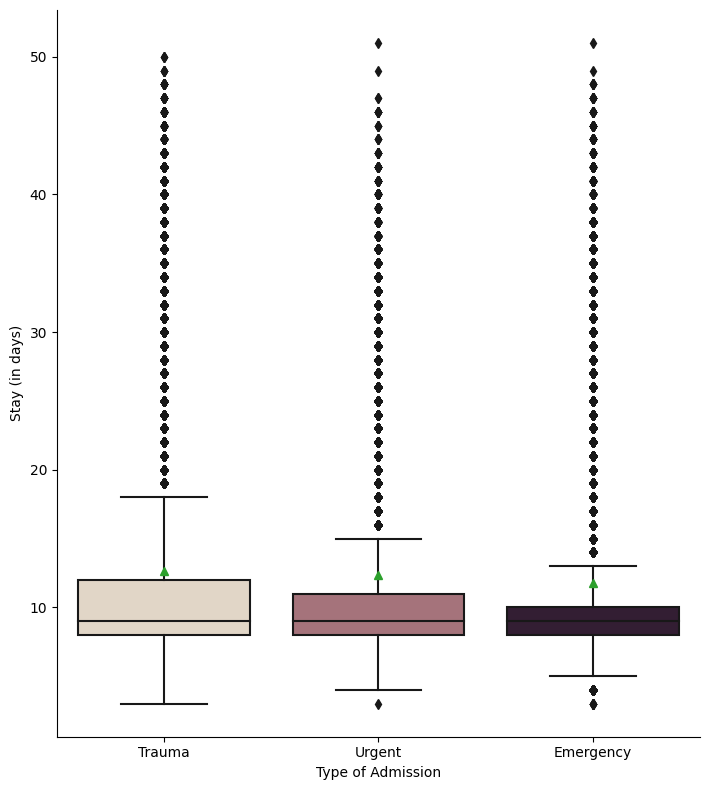

In [95]:
sns.catplot(data=data_train,x='Type of Admission',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

tenia esperanza en este dato pero esta muy desbalanceado, tiene un monton de outliers y estan todos mas o menos igual no creo que sirva de nada este dato

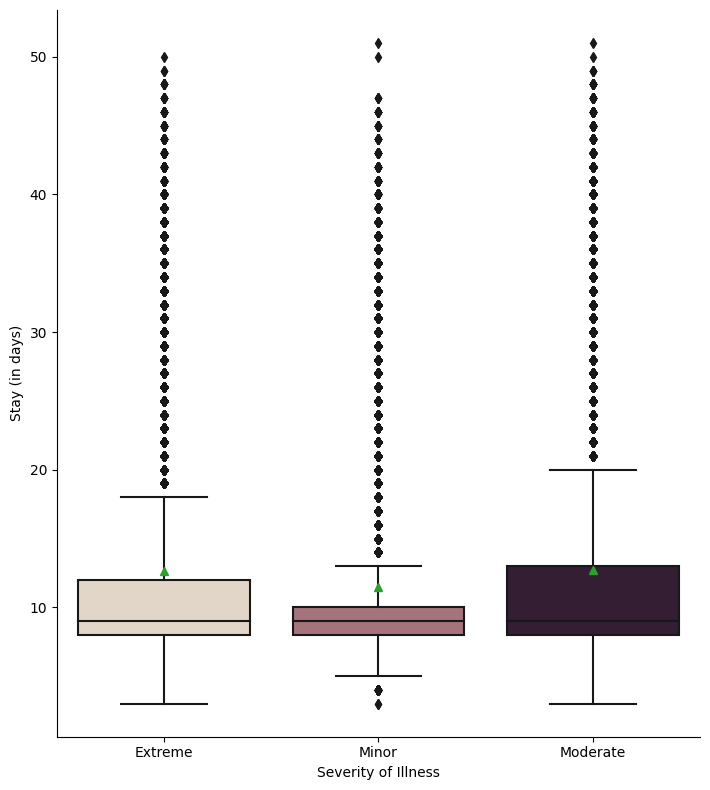

In [96]:
sns.catplot(data=data_train,x='Severity of Illness',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

practicamente igual que el anterior

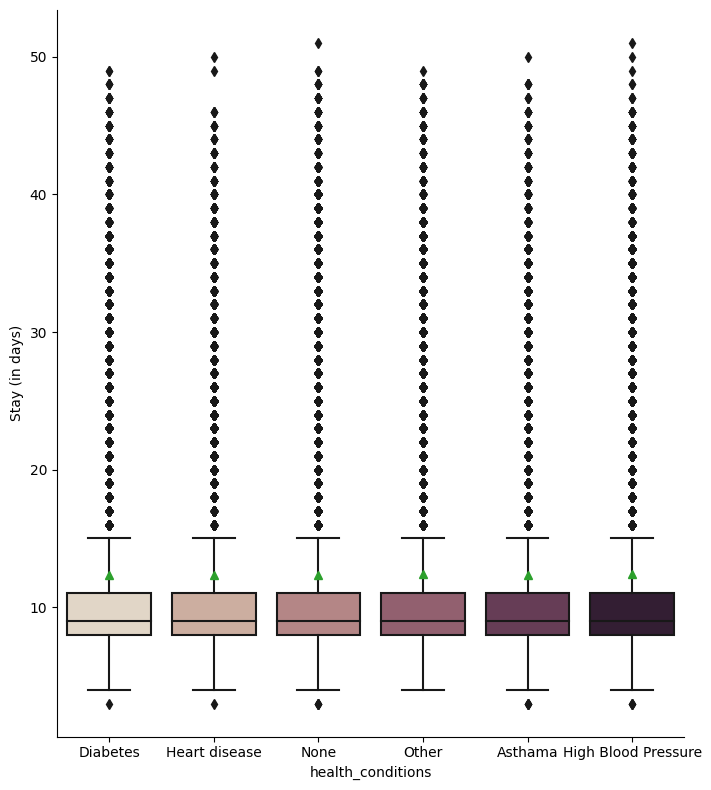

In [97]:
sns.catplot(data=data_train,x='health_conditions',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

igual que el anterior, incluso peor

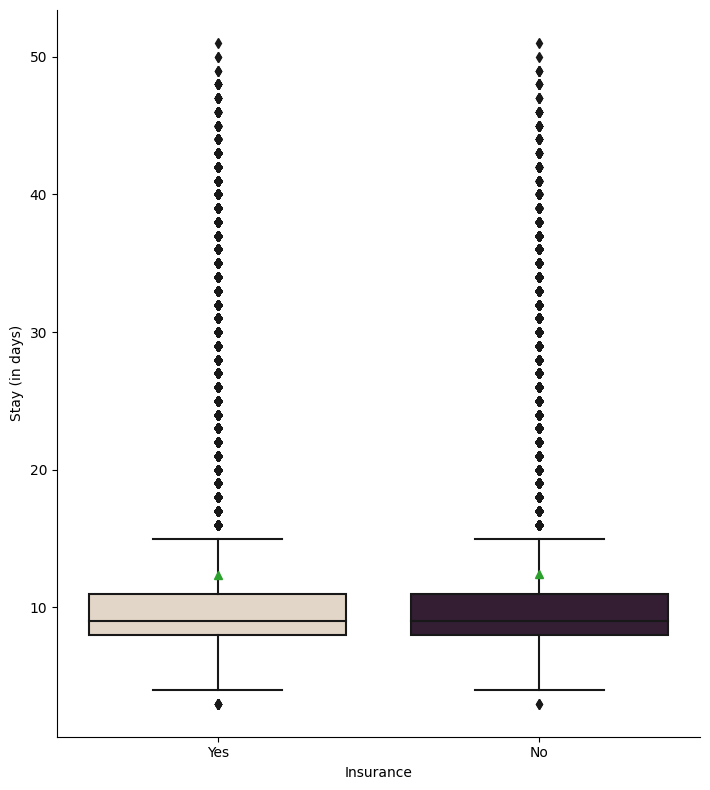

In [98]:
sns.catplot(data=data_train,x='Insurance',y='Stay (in days)',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

finalmente los datos que pueden llegar a servir son: edad, genero y quizas departamento, no miro doctores porque imagino que sera igual que departamento ademas de que pueden haber otros doctores en el dataset de test.
Creo que al usar tan poca informacion del estado del paciente y basandome unicamente en la edad y el sexo va a tener un acierto bastante malo, por la edad va a poder separar los grupos que marque antes y por sexo puede llegar a deducir algun caso

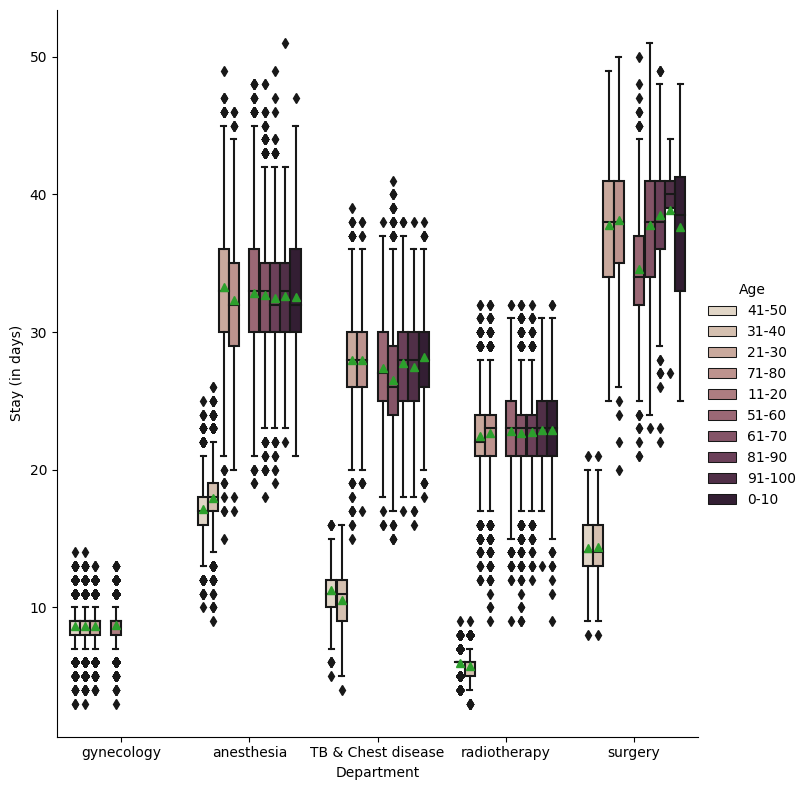

In [99]:
sns.catplot(data=data_train,x='Department',y='Stay (in days)',hue='Age',showmeans=True,kind='box', palette="ch:.25",height=8,aspect=0.9);

si agrupo por departamento y por edad veo que puedo diferenciar los que se atienden por radioterapia y tienen entre 31-50 pero no mucho mas veré cuanta precision me agrega y si vale la pena agrear una feature mas

In [100]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#transformo todos los datos a numericos
data_train['Department_le']=le.fit_transform(data_train['Department'])
print(le.classes_)
data_train['Age_le']=le.fit_transform(data_train['Age'])
print(le.classes_)
data_train['gender_le']=le.fit_transform(data_train['gender'])
print(le.classes_)


['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']
['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']
['Female' 'Male' 'Other']


In [101]:
#tranformlo los dias de estadia en valores binarios, siendo 0 que no es una estadia larga y 1 que si es una estadia larga
data_train.loc[data_train['Stay (in days)']<=8, 'Stay_le'] = 0
data_train.loc[data_train['Stay (in days)']> 8, 'Stay_le'] = 1

In [102]:
data_train.corr()['Stay_le'].sort_values()

Department_le                       -0.173021
Admission_Deposit                   -0.016650
Visitors with Patient               -0.009529
patientid                           -0.000532
staff_available                      0.002883
Available Extra Rooms in Hospital    0.053894
gender_le                            0.193878
Age_le                               0.229657
Stay (in days)                       0.493378
Stay_le                              1.000000
Name: Stay_le, dtype: float64

claramente los datos mas relevantes son genero,edad y departamento,ignorando Stay (in days)

In [103]:
X = data_train[['Department_le','Age_le','gender_le']].values
y = data_train['Stay_le'].values

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

voy a probar varios modelos y su rendimiento y me quedare el que de mejores resultados de accuracy y recall

In [106]:
logisticModel = LogisticRegression()
cross_val_score(logisticModel,X,y,cv=5)

array([0.59257317, 0.58820732, 0.59541463, 0.59965854, 0.57919512])

In [107]:
treeModel = DecisionTreeClassifier(max_depth=8)
cross_val_score(treeModel,X,y,cv=5)

array([0.6875122 , 0.68712195, 0.68754878, 0.68823171, 0.68765854])

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
ymin=np.full((82000,1),1)
print('accuracy score:',accuracy_score(ymin,y_test))
#al menos busco superar esa accuracy

accuracy score: 0.6218170731707318


In [110]:
logisticModel = LogisticRegression(random_state=42)
logisticModel.fit(X_train,y_train)
y_pred = logisticModel.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.5921463414634146


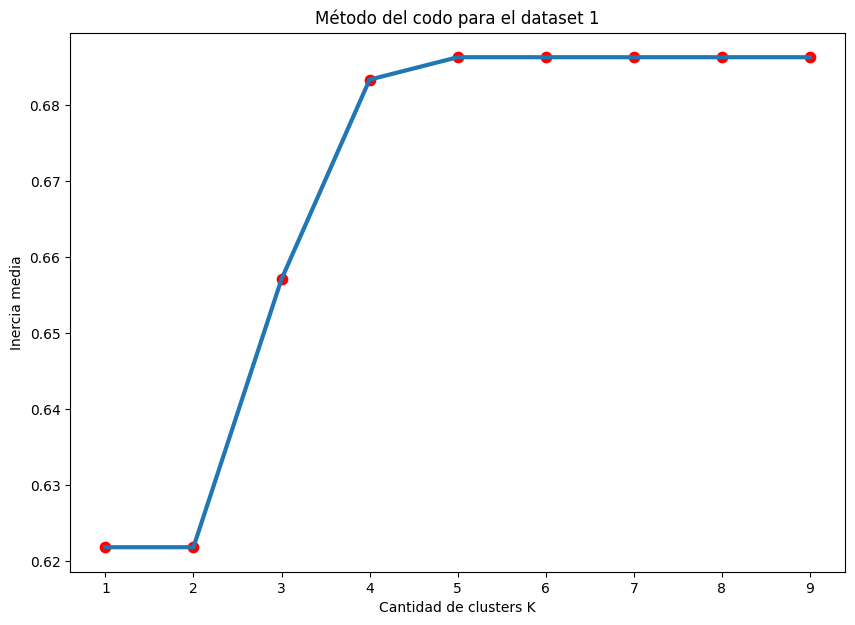

In [111]:
accuracy_scores = []
recall_scores = []
K = np.arange(1,10)
for k in K:
  tree_model = DecisionTreeClassifier(max_depth=k)
  tree_model.fit(X_train,y_train)
  y_pred = tree_model.predict(X_test)
  recall_scores.append(recall_score(y_test, y_pred, average= None))
  accuracy_scores .append(accuracy_score(y_pred,y_test))
plt.figure(figsize = (10,7))
plt.plot(K, accuracy_scores , lw=3)
plt.scatter(K, accuracy_scores ,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el dataset 1')

plt.show()

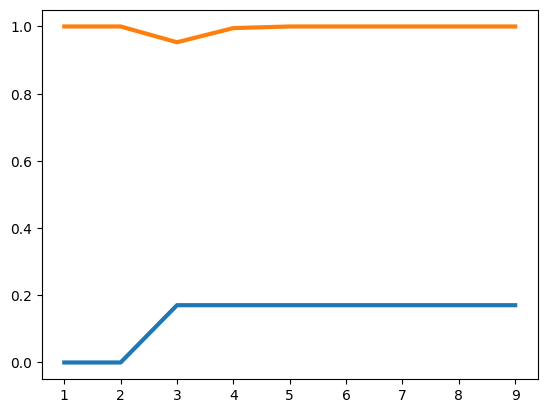

In [122]:

plt.plot(K,recall_scores,lw=3);

4 parece el mejor valor de profundidad, eso parece ser todo lo capaz que es de deducir una estadia corta

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import joblib
import numpy as np


hago el pipeline de mi modelo

In [114]:
pipe_Tree = Pipeline([('scaler', StandardScaler()),
			('pca', PCA(n_components=3)),
			('clf', DecisionTreeClassifier(max_depth=4,random_state=42))])
 
pipe_Tree.fit(X_train,y_train)
y_pred = pipe_Tree.predict(X_test)
print('accuracy score:',accuracy_score(y_pred,y_test))
print('recall:',recall_score(y_test, y_pred, average= None))

accuracy score: 0.6762560975609756
recall: [0.14714134 0.9980584 ]


predice muy bien cuando son estadias largas pero muy mal cuando son estadias cortas, es apenas un poco mejor que decir que siempre son estadias largas

In [115]:
data_test = pd.read_csv('hospitalizaciones_test.csv')
data_test = data_test[['Department','Age','gender']]
for column in data_test:
  data_test[column] = le.fit_transform(data_test[column])

In [117]:
X = data_test.values
predicciones = pipe_Tree.predict(X)
predicciones = pd.DataFrame(y.reshape(-1,1), columns=['pred'])
predicciones

,pred
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
409995,0.0
409996,1.0
409997,1.0
409998,1.0


In [119]:
predicciones.to_csv('Lautaro-Cenni.csv',index=False)